In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv('/content/drive/MyDrive/ml-data/bike-sharing-demand/train.csv')
data.head(5)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [3]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [4]:
data['datetime'] = data.datetime.apply(pd.to_datetime)
data['year'] = data.datetime.apply(lambda t : t.year)
data['month'] = data.datetime.apply(lambda t : t.month)
data['day'] = data.datetime.apply(lambda t : t.day)
data['hour'] = data.datetime.apply(lambda t : t.hour)
data.head(5)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4


In [5]:
drop_target_columns = ['datetime', 'casual', 'registered']
data.drop(drop_target_columns, axis=1, inplace=True)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      10886 non-null  int64  
 1   holiday     10886 non-null  int64  
 2   workingday  10886 non-null  int64  
 3   weather     10886 non-null  int64  
 4   temp        10886 non-null  float64
 5   atemp       10886 non-null  float64
 6   humidity    10886 non-null  int64  
 7   windspeed   10886 non-null  float64
 8   count       10886 non-null  int64  
 9   year        10886 non-null  int64  
 10  month       10886 non-null  int64  
 11  day         10886 non-null  int64  
 12  hour        10886 non-null  int64  
dtypes: float64(3), int64(10)
memory usage: 1.1 MB


In [9]:
X = data.drop(['count'], axis=1, inplace=False)
y = data['count']
print(X.shape)
print(y.shape)

(10886, 12)
(10886,)


In [74]:
from sklearn.metrics import mean_squared_error, mean_absolute_error#, mean_squared_log_error

def rmsle(y, pred):
  log_y = np.log1p(y)
  log_pred = np.log1p(pred)
  squared_error = (log_y - log_pred) ** 2
  return np.sqrt(np.mean(squared_error))

def rmse(y, pred):
  return np.sqrt(mean_squared_error(y, pred))

# show and return MSE, RMSE, RMSLE
def evaluator(y, pred):
  mae_ = mean_absolute_error(y, pred)
  rmse_ = rmse(y, pred)
  rmsle_ = rmsle(y, pred)
  print("RMSLE : %.3f, RMSE : %.3f, MAE : %.3f"%(rmsle_, rmse_, mae_))
  return mae_, rmse_, rmsle_

In [40]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# By using LinearRegression model, Predict!
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
pred = lr_reg.predict(X_test)

evaluator(y_test, pred)

RMSLE : 1.191, RMSE : 141.973, MAE : 106.387


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log1p
  """


(106.3865787799332, 141.97306616836852, 1.1909588528280057)

In [43]:
def get_top_error_data(y, pred, n_tops= 5):
  result_df = pd.DataFrame(y.values, columns=['real_count'])
  result_df['predicted_count'] = np.round(pred)
  result_df['diff'] = np.abs(result_df['real_count'] - result_df['predicted_count'])

  print(result_df.sort_values('diff', ascending=False)[:n_tops])

get_top_error_data(y_test, pred)

      real_count  predicted_count   diff
1618         890            321.0  569.0
966          884            325.0  559.0
412          745            193.0  552.0
454          721            177.0  544.0
1003         713            171.0  542.0


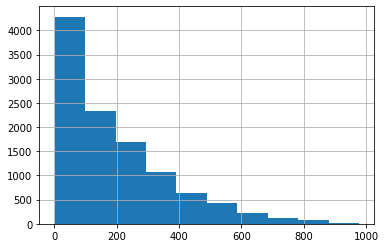

In [44]:
y.hist()

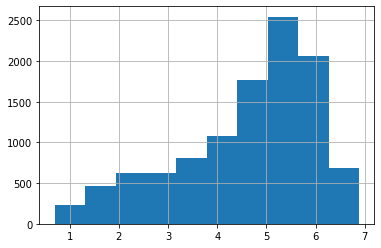

In [72]:
y_log_transform = np.log1p(y)
y_log_transform.hist()

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y_log_transform, test_size=0.3, random_state=0)
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
pred = lr_reg.predict(X_test)

y_test_exp = np.expm1(y_test)

pred_exp = np.expm1(pred)

evaluator(y_test_exp, pred_exp)

RMSLE : 1.017, RMSE : 162.594, MAE : 109.286


(109.28615860077622, 162.59426809004776, 1.0168265982003497)

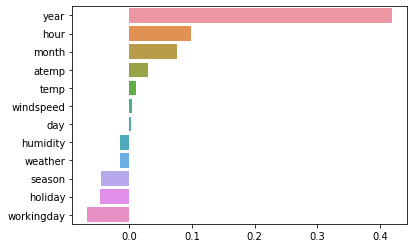

In [76]:
import seaborn as sns

coef = pd.Series(lr_reg.coef_, index=X.columns)
coef_sorted = coef.sort_values(ascending=False)
sns.barplot(x=coef_sorted.values, y=coef_sorted.index)

In [77]:
X_ohe = pd.get_dummies(X, columns=['year', 'hour', 'month', 'season', 'holiday', 'workingday', 'weather', 'day'])

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X_ohe, y_log_transform, test_size=.3, random_state=0)

def model_fit_predict(model, X_train, X_test, y_train, y_test, is_expm1=False):
  model.fit(X_train, y_train)
  pred = model.predict(X_test)
  if is_expm1:
    y_test = np.expm1(y_test)
    pred = np.expm1(pred)
  print('###', model.__class__.__name__,'###')
  evaluator(y_test, pred)

lr_reg = LinearRegression()
ridge_reg1 = Ridge(alpha=1.)
ridge_reg01 = Ridge(alpha=0.1)
lasso_reg0005 = Lasso(alpha=0.005)
lasso_reg00001 = Lasso(alpha=0.0001)

for model in [lr_reg, ridge_reg1, ridge_reg01, lasso_reg0005, lasso_reg00001]:
  model_fit_predict(model, X_train, X_test, y_train, y_test, is_expm1=True)

### LinearRegression ###
RMSLE : 0.590, RMSE : 97.690, MAE : 63.383
### Ridge ###
RMSLE : 0.590, RMSE : 97.745, MAE : 63.416
### Ridge ###
RMSLE : 0.590, RMSE : 97.693, MAE : 63.385
### Lasso ###
RMSLE : 0.602, RMSE : 104.068, MAE : 66.672
### Lasso ###
RMSLE : 0.589, RMSE : 97.698, MAE : 63.356


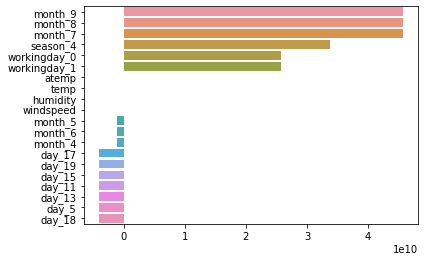

In [87]:
coef = pd.Series(lr_reg.coef_, index=X_ohe.columns)
coef_sorted = coef.sort_values(ascending=False)[:20]
sns.barplot(x=coef_sorted, y=coef_sorted.index)

In [88]:
# by using Tree based Regressor, Predict it

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

rf_reg = RandomForestRegressor(n_estimators=500)
gbm_reg = GradientBoostingRegressor(n_estimators=500)
xgb_reg = XGBRegressor(n_estimators=500)
lgbm_reg = LGBMRegressor(n_estimators=500)

for model in [rf_reg, gbm_reg, xgb_reg, lgbm_reg]:
  model_fit_predict(model, X_train, X_test, y_train, y_test, is_expm1=True)

### RandomForestRegressor ###
RMSLE : 0.353, RMSE : 50.292, MAE : 31.106
### GradientBoostingRegressor ###
RMSLE : 0.330, RMSE : 53.389, MAE : 32.762
[10:58:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
### XGBRegressor ###
RMSLE : 0.345, RMSE : 58.245, MAE : 35.767
### LGBMRegressor ###
RMSLE : 0.319, RMSE : 47.215, MAE : 29.029
